<a href="https://colab.research.google.com/github/Jeremy-Alekai/Ecommerce-Item-Purchase-Prediction/blob/main/Ecommerce_Item_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTIONS**

Source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

**Source of data:**

This dataset is sourced from the UCI Machine Learning Repository, a public repository of machine learning datasets.


**Brief description of data:**

This dataset contains information on online shoppers' purchasing behavior, including various features such as the type of product, whether the user is a returning visitor, the time of day and week, the duration of the session, and various page views and interactions.

**What is the target?**

The target could be to predict whether an online shopper is likely to make a purchase or not based on various features such as product type, user behavior, and session duration.


**Is this a classification or regression problem?** 

This is a classification problem.

**How many features?** 

There are several features including the type of product, whether the user is a returning visitor, the time of day and week, the duration of the session, and various page views and interactions.

**How many rows of data?** 

The dataset contains 12330 rows of data.

**What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?**

Some challenges that could be encountered include missing values, inconsistent data formats, and outliers in the data. Additionally, the dataset contains a large number of categorical features, which may need to be appropriately encoded for modeling purposes.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np

In [48]:

filename = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project 2/online_shoppers_intention.csv'
df = pd.read_csv(filename)

In [49]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [50]:
df.shape
# Row 12330 # columns 18

(12330, 18)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [52]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [53]:
df.duplicated().sum()

125

In [54]:
df=df.drop_duplicates()

In [55]:
df.duplicated().sum()


0

In [56]:
# # Drop unnecessary columns
# df = df.drop(['Informational', 'Informational_Duration',
#               'ProductRelated_Duration', 'ExitRates', 'SpecialDay'], axis=1)

In [57]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [58]:
# Address inconsistencies in categorical data
df.loc[:, 'Month'] = df['Month'].str.capitalize() # capitalize the first letter of each month name

# Address inconsistencies in 'Month' column
df.loc[:, 'Month'] = df['Month'].replace({'June':'Jun'})

In [59]:
df['Month'].value_counts()

May    3329
Nov    2982
Mar    1860
Dec    1706
Oct     549
Sep     448
Aug     433
Jul     432
Jun     285
Feb     181
Name: Month, dtype: int64

In [60]:
# Number of months in the data set
print(f"there are {df['Month'].value_counts().count()} Months registered in the dataset.")

there are 10 Months registered in the dataset.


In [61]:
# checking inconsistencies in categorical data
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [62]:
# The code calculates descriptive statistics of the numerical features in the dataset,
#  transposes the resulting table for easier readability, and displays the statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


**Visualization**

In [63]:
#Libraries used
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# # the for loop iterates through each bar in the countplot and retrieves the height of the bar using p.get_height().
# #  The annotate function is used to add text labels above each bar using the x and y coordinates. 
# # The '{:.0f}'.format() function is used to format the count values as integers without any decimal places.
#  round() function to round off


def plot_categorical_data(df, col, hue=None, figsize=(10,6)):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.countplot(x=col, hue=hue, data=df, ax=ax)
    
    # Annotate bars with count values
    for p in ax.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + count
        ax.annotate(f'{count}\n{count/len(df)*100:.2f}%', (x, y), ha='center', fontsize=12)
    
    # Show percentage share
    if hue:
        share = df.groupby(col)[hue].value_counts(normalize=True).mul(100).round(2)
    else:
        share = df[col].value_counts(normalize=True).mul(100).round(2)
    
    # Set plot aesthetics
    sns.despine(left=True)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title=hue)
    plt.show()


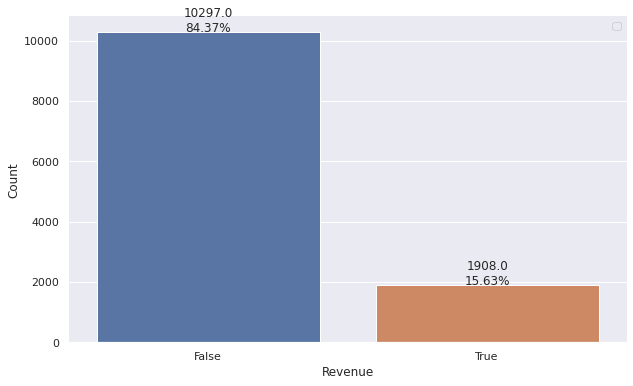

In [74]:
# The chart provides a quick visualization of the distribution of the "Revenue" column in the dataset.
# 
plot_categorical_data(df, 'Revenue', hue=None)

Only 15.63% people ended up making 1 or more purchase

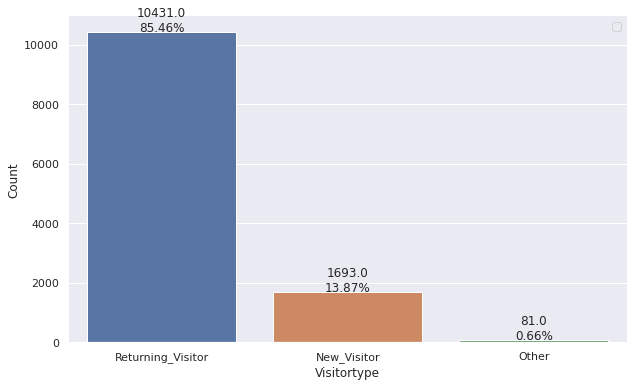

In [76]:
plot_categorical_data(df, 'VisitorType', hue=None)

85% of customers returns back to site, which is a good indication. Meaning that our customers are satisfied with what they are getting. 13.74% of customers are new customers

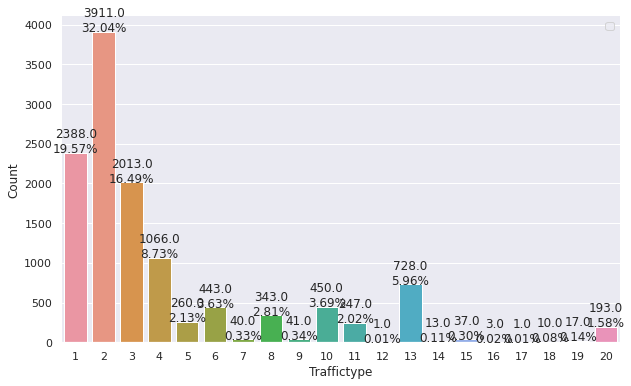

In [80]:
plot_categorical_data(df, 'TrafficType')

1. Most of our visitors are coming from traffic type 2 - around 32%
total.
2. 83% of visitors coming from 5 major traffic type 1,2,3,4, and 13


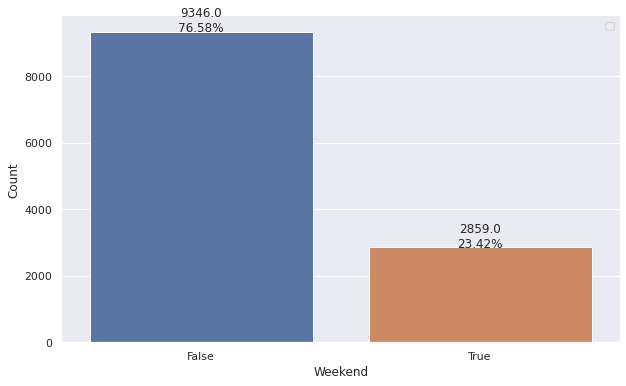

In [82]:
plot_categorical_data(df, 'Weekend')

Less people visit this site during weekdays than weekends

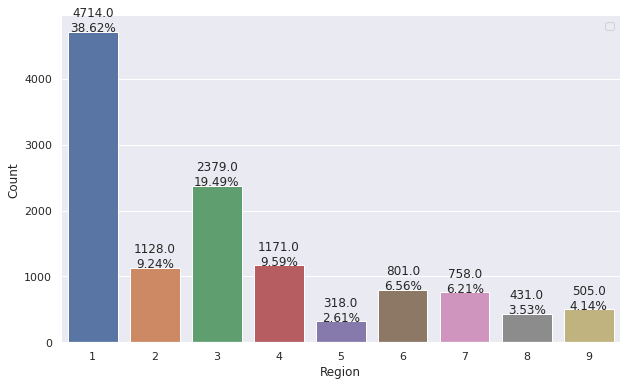

In [83]:
plot_categorical_data(df, 'Region')


Close to 39% of visitors come from region 1 followed by 19.5% from region 3

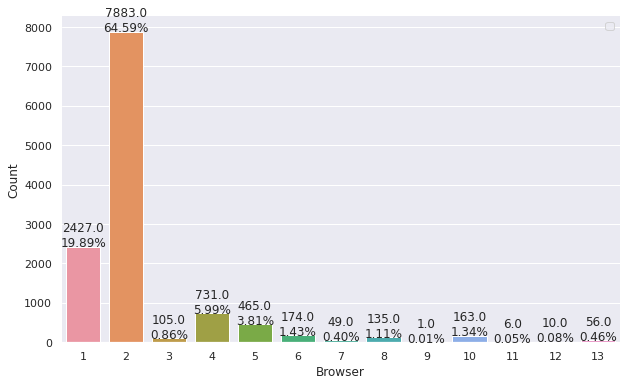

In [84]:
plot_categorical_data(df, 'Browser')

64.5% percent of visitors are coming from browser 2 followed by 19.9% from browser 1.

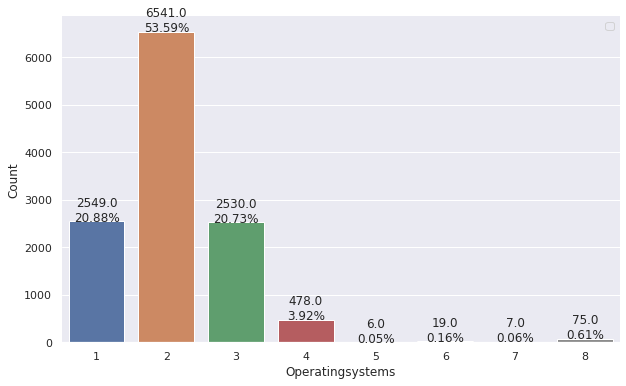

In [85]:
plot_categorical_data(df, 'OperatingSystems')

* More than 50% of people visiting the site are using operating system 2.
* Around 95% of people visiting are coming from major three operating systems - os 2 (53.5%), os 1 (21%), os 3 (21%)


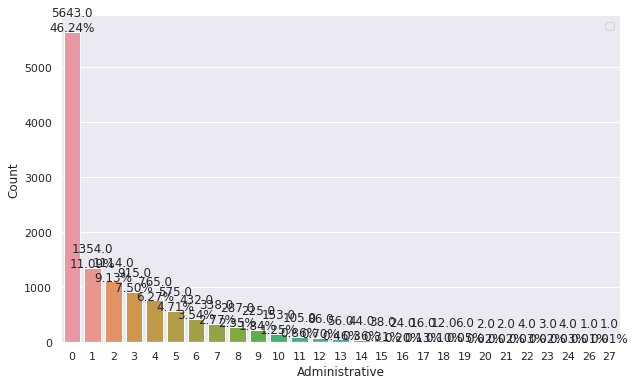

In [86]:
plot_categorical_data(df, 'Administrative')

* users tend to visit page 0 the most often.

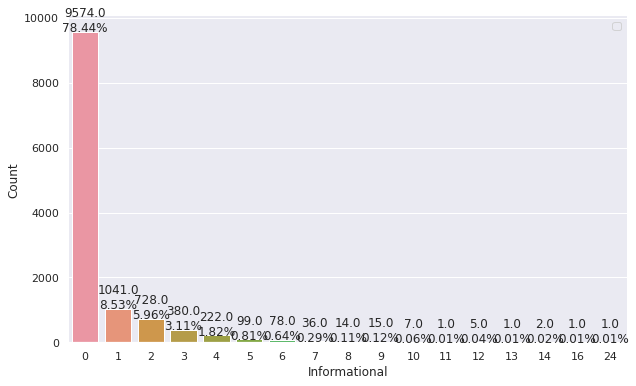

In [87]:
plot_categorical_data(df, 'Informational')

we can see that Information page 0 has the highest number of visitors.

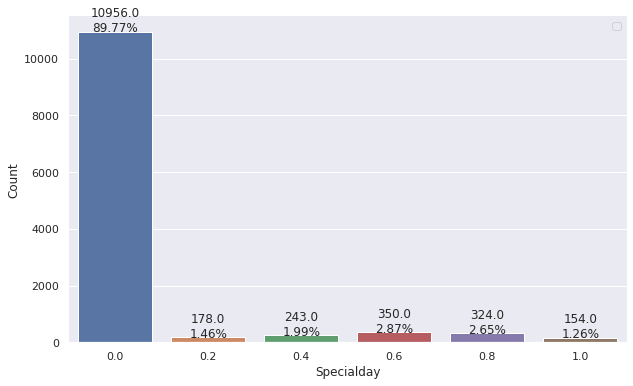

In [88]:
plot_categorical_data(df, 'SpecialDay')

we can see that special days (e.g. public holidays) have no impact on the number of visitors to our website.

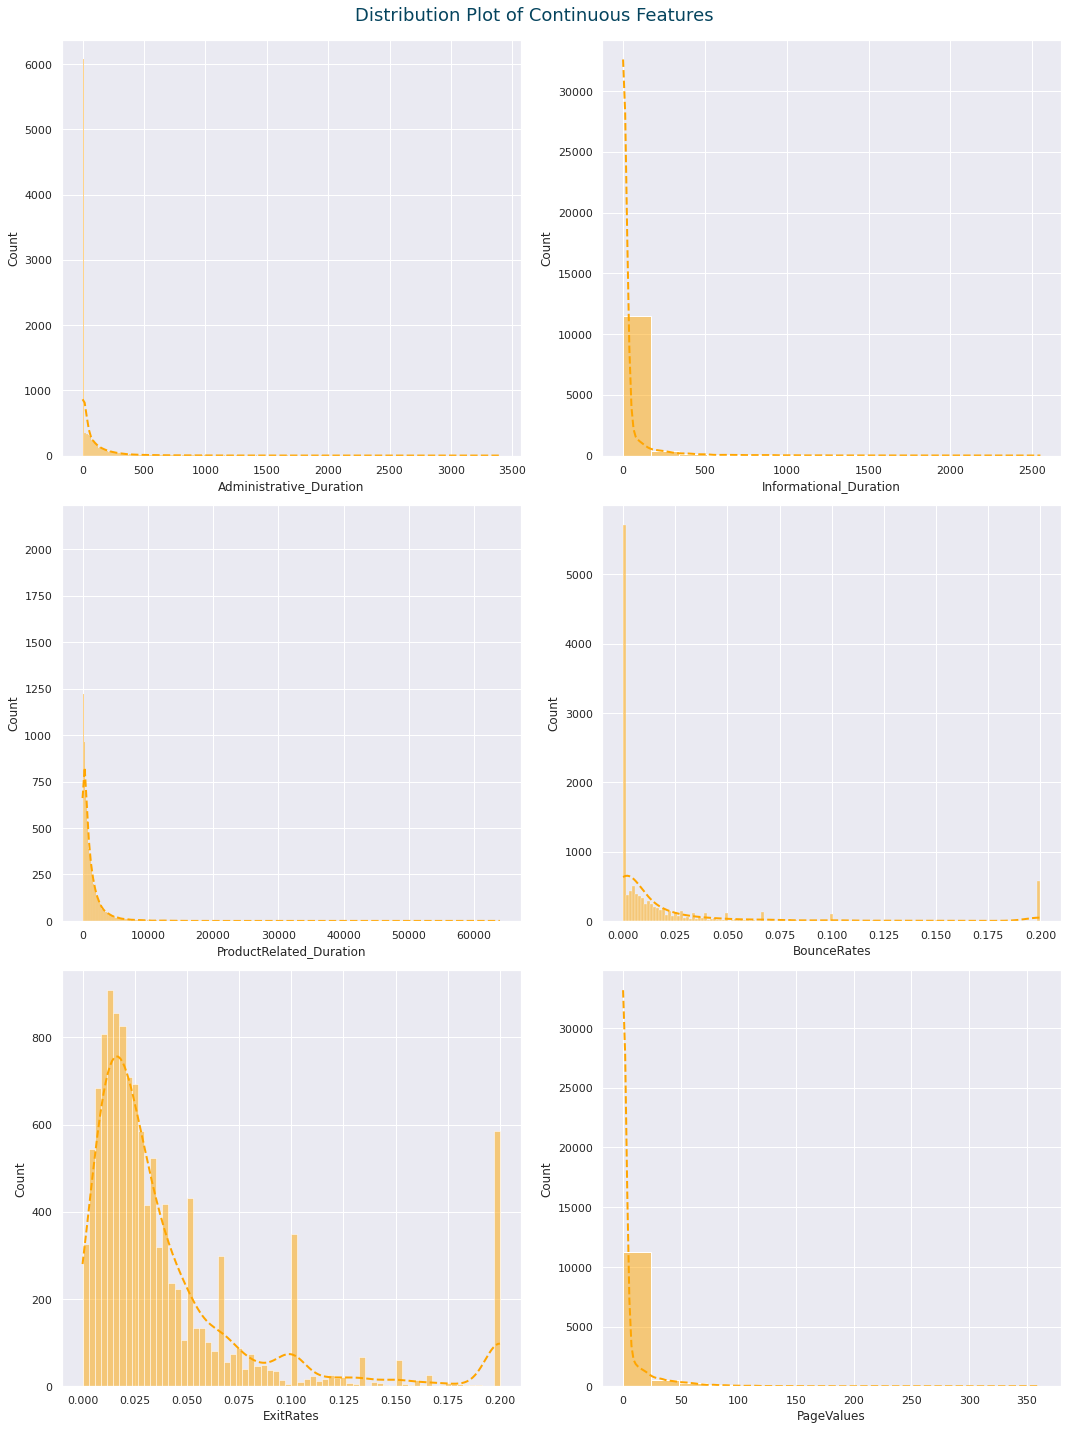

In [81]:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()